* Nama : Maulita Yasmin Nadila
* Kelas : 3E
* Absen : 18   
* NIM : 2241720010

# Jobsheet 4

## Praktikum 1

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

* import numpy as np : Mengimpor NumPy dengan alias np, sebuah library yang digunakan untuk komputasi numerik dengan array multi-dimensi dan berbagai fungsi matematika. NumPy sangat efisien dalam mengelola data dalam bentuk array dan matriks, serta mendukung operasi matematika tingkat lanjut.
* import matplotlib.pyplot as plt : Mengimpor Matplotlib dengan alias plt, sebuah library untuk membuat grafik 2D. Modul pyplot dari Matplotlib memungkinkan membuat berbagai jenis visualisasi (seperti plot garis, histogram, scatter plot, dll.) secara interaktif dan sederhana.
* from scipy import stats : Mengimpor modul stats dari SciPy (Scientific Python), yang menyediakan berbagai fungsi statistik, termasuk distribusi probabilitas, uji hipotesis, dan lainnya.
* import seaborn as sns : Mengimpor Seaborn, sebuah library untuk visualisasi data yang dibangun di atas Matplotlib, tetapi menyediakan interface yang lebih menarik dan lebih mudah digunakan untuk plot statistik.

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

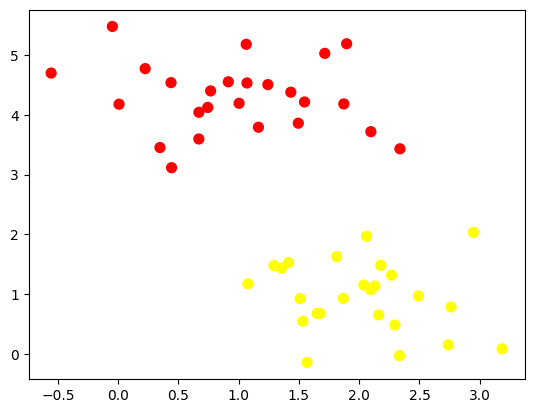

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

* from sklearn.datasets import make_blobs : Mengimpor fungsi make_blobs dari pustaka sklearn.datasets. make_blobs digunakan untuk membuat dataset buatan berupa beberapa kelompok (blobs) yang dapat digunakan untuk analisis klaster, visualisasi, atau latihan dengan model pembelajaran mesin.
* X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) : make_blobs menghasilkan data dengan dua output : X (array 2D berisi koordinat titik-titik dalam dataset (fitur)), y (label atau target setiap titik). n_samples=50: menghasilkan 50 sampel (titik). centers=2: membuat dua pusat cluster (atau dua kelas).  random_state=0: mengatur seed untuk menghasilkan dataset yang sama setiap kali kode dijalankan (reproduksibilitas). cluster_std=0.60: menentukan standar deviasi dari setiap cluster, yang mengontrol seberapa tersebar titik-titik di sekitar pusat cluster.
* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') : plt.scatter membuat scatter plot dari dataset. X[:, 0]: Koordinat x dari titik-titik (kolom pertama dari X). X[:, 1]: Koordinat y dari titik-titik (kolom kedua dari X). c=y: mengatur warna titik-titik berdasarkan label/target y, yang menunjukkan cluster mana yang dimiliki setiap titik.
s=50: mengatur ukuran titik menjadi 50.
cmap='autumn': menggunakan colormap 'autumn' untuk memberikan warna sesuai dengan label y (setiap cluster memiliki warna berbeda).

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

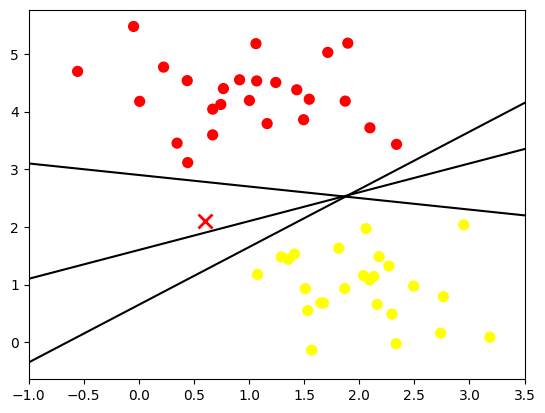

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

* xfit = np.linspace(-1, 3.5) : membuat array 1D xfit dengan nilai-nilai yang tersebar secara merata dari -1 hingga 3.5, yang akan digunakan untuk menggambar garis lurus di plot.
* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') : membuat scatter plot untuk data yang disimpan dalam X. c=y: memberikan warna pada setiap titik sesuai dengan label y. s=50: mengatur ukuran titik pada scatter plot menjadi 50. cmap='autumn': Menetapkan palet warna untuk titik-titik sesuai dengan kolom y menggunakan colormap 'autumn'.
* plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) : menambahkan satu titik merah ('x') di posisi (0.6, 2.1). markeredgewidth=2: Mengatur ketebalan tepi dari tanda 'x'. markersize=10: Mengatur ukuran tanda 'x'.
* for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)] : melakukan iterasi melalui tiga pasangan nilai slope (m) dan intercept (b).
* plt.plot(xfit, m * xfit + b, '-k') : setiap pasangan (m, b), menggambar garis dengan slope m dan intercept b. '-k': menggambarkan garis hitam (- untuk garis solid dan k untuk warna hitam).
* plt.xlim(-1, 3.5) : mengatur batas x-axis dari -1 hingga 3.5.


Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

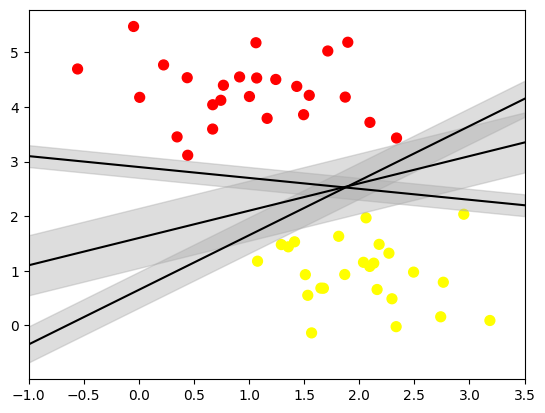

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

* xfit = np.linspace(-1, 3.5) : digunakan sebagai sumbu x untuk menggambar garis lurus antara -1 hingga 3.5
* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') : membuat scatter plot dengan titik-titik yang diambil dari array X. c=y: Mengatur warna titik berdasarkan label y. s=50: Ukuran titik adalah 50. cmap='autumn': Warna diambil dari colormap 'autumn'.
* for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)] : Melakukan iterasi melalui tiga set nilai slope (m), intercept (b), dan deviasi (d) untuk tiga garis yang berbeda. m: Slope dari garis lurus. b: Intercept, titik di mana garis memotong sumbu y. d: Deviasi yang digunakan untuk menggambar area bayangan di sekitar garis (semacam margin atau interval ketidakpastian).
* yfit = m * xfit + b : Menghitung koordinat y untuk garis lurus menggunakan persamaan garis: y = mx + b.
* plt.plot(xfit, yfit, '-k') : Menggambar garis lurus dengan koordinat (xfit, yfit) menggunakan garis hitam ('-k').
* plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4) : xfit: Sumbu x. yfit - d dan yfit + d: Batas bawah dan atas dari area bayangan edgecolor='none': Menghilangkan garis tepi di sekitar area bayangan. color='#AAAAAA': Memberikan warna abu-abu pada area bayangan.
alpha=0.4: Mengatur transparansi dari area bayangan, membuatnya lebih samar.
* plt.xlim(-1, 3.5) : Mengatur batas untuk sumbu x dari -1 hingga 3.5.

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

Penerapan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

* from sklearn.svm import SVC : Mengimpor kelas SVC dari modul svm dalam Scikit-learn. SVC adalah implementasi dari Support Vector Classifier, yang digunakan untuk melakukan klasifikasi dengan memisahkan data ke dalam kelas yang berbeda.
* model = SVC(kernel='linear', C=1E10) : Membuat sebuah objek model SVC dengan parameter: kernel='linear': Menggunakan kernel linear untuk membuat model SVM. C=1E10: Mengatur parameter regularisasi C ke nilai yang sangat besar (1E10).
* model.fit(X, y) : Melatih model SVM menggunakan data yang ada: X: Data fitur, yaitu input yang akan digunakan oleh model untuk membuat prediksi. y: Label atau target klasifikasi yang sesuai untuk data X.


In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

* def plot_svc_decision_function(model, ax=None, plot_support=True): Membuat fungsi untuk menampilkan decision boundaries dari model SVM. model: Model SVC yang telah dilatih.
ax: Objek Axes dari Matplotlib (untuk menggambar plot). Jika tidak diberikan, akan menggunakan current axes (plt.gca()).
plot_support=True: Jika True, akan menampilkan support vectors di plot.
*     if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
: ax.get_xlim() dan ax.get_ylim(): Menyimpan batas-batas sumbu x dan y dari plot saat ini, agar dapat diatur ulang nanti.
*     x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
: np.linspace: Membuat nilai-nilai grid untuk sumbu x dan y dari batas plot. np.meshgrid(y, x): Membuat grid 2D dari nilai x dan y untuk mengevaluasi decision function di seluruh area plot. np.vstack(...).T: Menggabungkan nilai x dan y dari grid menjadi pasangan koordinat (x, y) untuk evaluasi.
*     P = model.decision_function(xy).reshape(X.shape) : model.decision_function(xy): Menghitung nilai decision function untuk setiap titik dalam grid. Nilai ini mengukur jarak setiap titik dari decision boundary.
.reshape(X.shape): Mengembalikan hasil evaluasi ke dalam bentuk yang sesuai dengan grid 2D.
*     ax.contour(X, Y, P, colors='k',
         levels=[-1, 0, 1], alpha=0.5,
         linestyles=['--', '-', '--'])
: ax.contour: Menggambar decision boundary dan margin:
levels=[-1, 0, 1]: 0 adalah decision boundary, sedangkan -1 dan 1 adalah margin kelas.
linestyles=['--', '-', '--']: Garis putus-putus untuk margin, dan garis penuh untuk decision boundary.
alpha=0.5: Mengatur transparansi garis.
*     if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
   model.support_vectors_[:, 1],
   s=300, linewidth=1, facecolors='none');
: model.support_vectors_: Mendapatkan support vectors dari model SVM.
ax.scatter: Menggambar support vectors di plot sebagai lingkaran kosong besar dengan ukuran 300 dan garis tepi tebal.
facecolors='none': Membuat lingkaran kosong (tanpa warna isi) untuk support vectors.
*     ax.set_xlim(xlim)
    ax.set_ylim(ylim)
: Mengatur kembali batas sumbu x dan y ke kondisi semula untuk menjaga visualisasi tetap konsisten.

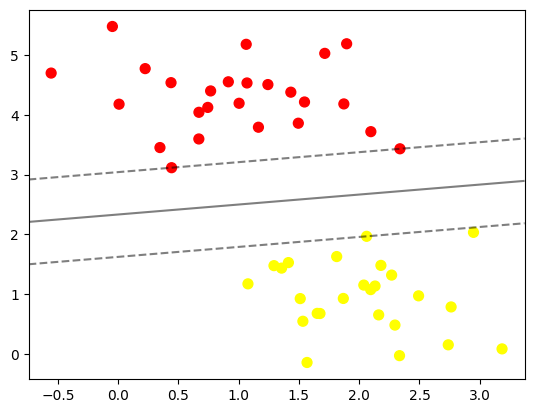

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') : Membuat scatter plot dari dataset X dan y:
X[:, 0]: Koordinat x dari titik-titik (fitur pertama dari data X).
X[:, 1]: Koordinat y dari titik-titik (fitur kedua dari data X).
c=y: Memberikan warna pada setiap titik berdasarkan label kelas y.
s=50: Mengatur ukuran titik menjadi 50.
cmap='autumn': Menggunakan colormap 'autumn' untuk mewarnai titik-titik berdasarkan label y.
* plot_svc_decision_function(model) : Memanggil fungsi plot_svc_decision_function untuk menampilkan decision boundaries dari model SVM yang sudah dilatih (model):
model: Model SVC yang sudah dilatih sebelumnya.
Fungsi ini akan menggambar decision boundary (garis yang memisahkan dua kelas) serta margin (+1 dan -1) di sekitar garis pemisah.
Jika opsi plot_support=True dalam fungsi, support vectors (titik data penting yang digunakan oleh SVM untuk menentukan margin) juga akan ditampilkan sebagai lingkaran kosong besar.

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

* model: Ini adalah objek SVC yang telah dilatih menggunakan metode .fit(X, y), di mana X adalah fitur input dan y adalah label target.
* support_vectors_: Ini adalah atribut dari objek model yang menyimpan koordinat dari semua support vectors yang ditemukan selama pelatihan.

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

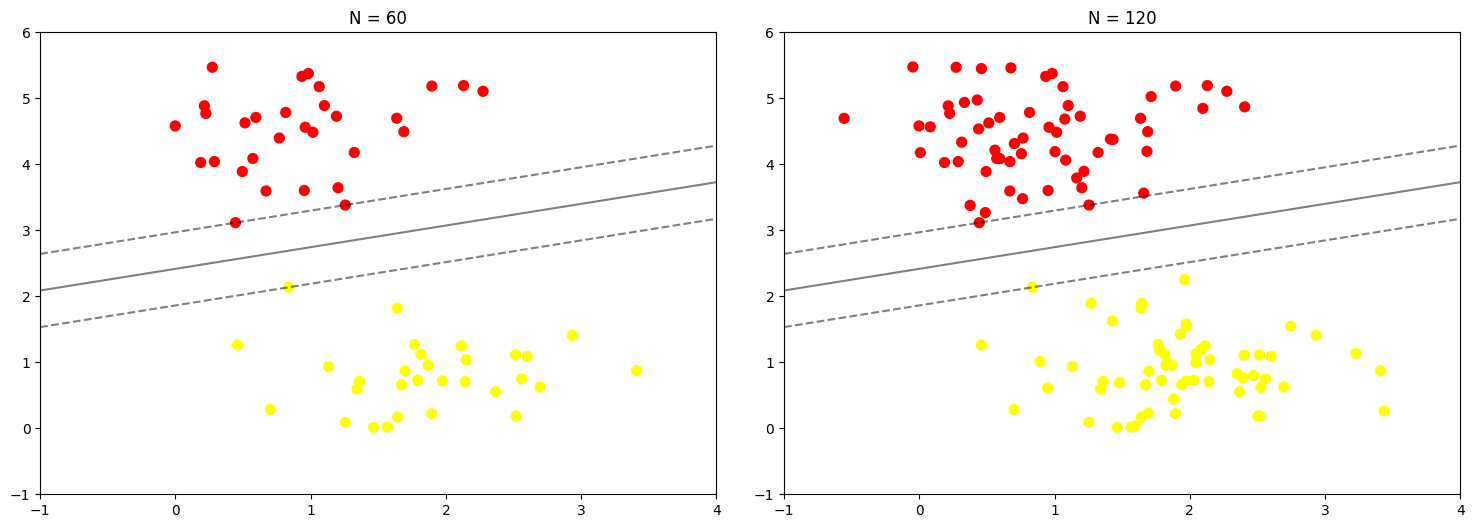

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

* N=10: Parameter untuk menentukan jumlah sampel yang akan digunakan dalam visualisasi (default adalah 10).
* make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60): Membuat dataset sintetis dengan 200 sampel dan 2 cluster/kategori.
* X = X[:N] dan y = y[:N]: Memilih N sampel pertama dari dataset X dan label y.
* model = SVC(kernel='linear', C=1E10): Membuat model SVM dengan kernel linear dan parameter regularisasi C yang sangat besar.
* model.fit(X, y): Melatih model SVM menggunakan data yang sudah dipilih (hanya N sampel pertama).
* ax = ax or plt.gca(): Menggunakan ax jika diberikan; jika tidak, menggunakan current axes (plt.gca()).
* x.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot data X dan y: X[:, 0] dan X[:, 1]: Koordinat x dan y dari data. c=y: Pewarnaan berdasarkan kelas y.
s=50: Ukuran titik. cmap='autumn': Colormap yang digunakan untuk mewarnai titik-titik.
* ax.set_xlim(-1, 4) dan ax.set_ylim(-1, 6): Mengatur batas tampilan plot pada sumbu x dan y.
* plot_svc_decision_function(model, ax): Memanggil fungsi untuk menampilkan decision boundary dan margin dari model SVM pada plot tersebut.
* fig, ax = plt.subplots(1, 2, figsize=(16, 6)): Membuat layout dengan dua subplot dalam satu baris dengan ukuran 16x6 inci.
* fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1): Mengatur margin antar subplot:
left=0.0625, right=0.95: Mengatur batas kiri dan kanan untuk plot. wspace=0.1: Mengatur ruang di antara dua subplot.
* for axi, N in zip(ax, [60, 120]):: Melakukan iterasi untuk dua subplot (ax) dengan jumlah sampel N=60 dan N=120: plot_svm(N, axi): Memanggil fungsi plot_svm dengan jumlah sampel N dan subplot axi. axi.set_title('N = {0}'.format(N)): Memberi judul pada setiap subplot dengan jumlah data yang digunakan (N=60 atau N=120).

Data Tidak Terpisah Secara Linear

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

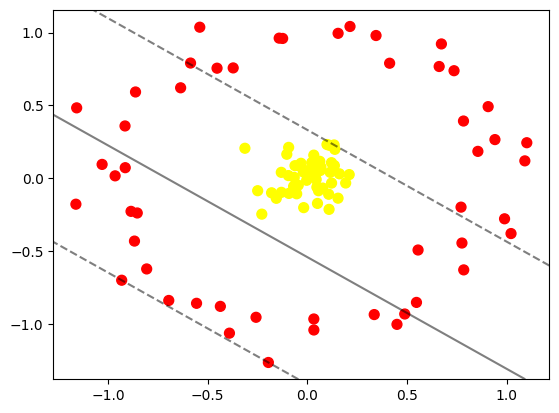

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

* make_circles(100, factor=.1, noise=.1): Membuat dataset berbentuk lingkaran konsentris dengan 100 sampel:
* factor=.1: Menentukan rasio antara radius lingkaran kecil dan besar (lingkaran kecil sangat kecil dibandingkan dengan lingkaran besar).
* noise=.1: Menambahkan sedikit kebisingan (noise) ke posisi titik data agar tidak sepenuhnya teratur.
* X: Fitur (koordinat x dan y) dari titik-titik dalam bentuk lingkaran.
* y: Label target yang mengindikasikan kelas (0 atau 1), di mana kelas ini tidak terpisah secara linier.
* SVC(kernel='linear'): Membuat model SVM dengan kernel linier. Kernel linier mencoba memisahkan data dengan garis lurus (hyperplane).
* .fit(X, y): Melatih model SVM menggunakan data fitur X dan label target y.
* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot untuk menampilkan data X.
* plot_svc_decision_function(clf, plot_support=False): Memanggil fungsi yang menampilkan decision boundary dari model SVM (clf).

In [ ]:
r = np.exp(-(X ** 2).sum(1))

* X ** 2: Mengkuadratkan setiap elemen dari array X.
* .sum(1): Menjumlahkan nilai kuadrat dari setiap baris. Operasi ini menghasilkan jumlah elemen kuadrat pada masing-masing titik dalam array X.
* np.exp(-(...)): Menghitung fungsi eksponensial dari negatif hasil jumlah kuadrat tersebut.

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

NameError: name 'interact' is not defined

kode diatas eror karena interact belum didefiniskan, solusinya adalah menambahkan kode from ipywidgets import interact, fixed

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.7848811 , -0.62877642],
       [ 0.06019727,  0.05957816],
       [-0.12368832,  0.96011133],
       [-1.15707031,  0.48357875],
       [ 0.67280663,  0.92236921],
       [ 0.05109426, -0.17250754],
       [ 0.06819846,  0.07720611],
       [ 0.03105882,  0.05449196],
       [-0.39063297, -1.06313257],
       [-0.37183709,  0.75774803],
       [-0.69503739, -0.83868909],
       [ 0.77133779, -0.19803573],
       [-0.01384632,  0.05479595],
       [-0.0532245 , -0.10640209],
       [-0.93122563, -0.69982237],
       [-0.43621566, -0.87923127],
       [-0.01808164, -0.20141703],
       [ 0.16123109,  0.03066568],
       [-0.13000803, -0.09638376],
       [-0.06172011,  0.08672349],
       [ 0.0415888 ,  0.02923527],
       [-0.91456417,  0.35927774],
       [-0.53944665,  1.0372685 ],
       [-0.17926246, -0.09951511],
       [ 0.03293894, -1.04139907],
       [-0.8671099 , -0.43104929],
       [ 0.04805089, -0.06043821],
       [-0.14103925,  0.96206412],
       [-0.96426302,  0.01682635],
       [-0.31302958,  0.20619393],
       [ 0.77588721, -0.44442231],
       [-0.8618221 ,  0.59255971],
       [-0.06878428, -0.05545951],
       [ 0.90737721,  0.49200086],
       [ 0.03255313,  0.15897097],
       [ 0.98973112, -0.2780259 ],
       [-0.09214689, -0.10380932],
       [ 0.13453004,  0.22887313],
       [-0.4528574 ,  0.75585309],
       [-0.15550652, -0.13734562],
       [ 1.02216132, -0.37934921],
       [-0.25723705, -0.9542047 ],
       [-0.22824817, -0.24608533],
       [ 0.06268903,  0.11665064],
       [ 0.55573518, -0.4923019 ],
       [ 0.04445231, -0.0084087 ],
       [-0.09456242,  0.01865656],
       [-0.88437623, -0.22698568],
       [ 0.13581454,  0.087285  ],
       [ 0.1149483 ,  0.04103375],
       [ 0.12130892,  0.10720008],
       [-1.16102665, -0.17787662],
       [ 1.10131503,  0.24421523],
       [ 0.85585048,  0.1848655 ],
       [ 0.05629571, -0.08538323],
       [ 0.21021896,  0.02540196],
       [ 0.02705769,  0.04288988],
       [-0.00319573, -0.01359108],
       [-1.02950767,  0.09534356],
       [-0.0436961 ,  0.08646129],
       [ 0.11050965,  0.22655101],
       [ 0.21428057,  1.04222971],
       [ 0.33578442, -0.93557016],
       [ 0.94143238,  0.26571027],
       [-0.13048403,  0.04083975],
       [-0.0196598 ,  0.04363268],
       [ 0.41310624,  0.78993832],
       [-0.06562251,  0.0063434 ],
       [-0.19535265, -1.26444068],
       [ 0.44994265, -1.00279418],
       [-0.09353821,  0.21229115],
       [-0.63550631,  0.62126121],
       [-0.24895636, -0.08515331],
       [ 0.73622059,  0.73856775],
       [-0.04543449, -0.04765573],
       [ 0.07734484, -0.06716124],
       [-0.85322185, -0.23812199],
       [ 0.10921245, -0.21330419],
       [ 0.12178057, -0.03281209],
       [ 0.48891955, -0.93162032],
       [ 0.09876332,  0.23195047],
       [ 1.09152631,  0.11962212],
       [-0.55565532, -0.85824087],
       [ 0.03278849, -0.96581031],
       [ 0.15424512, -0.13655606],
       [ 0.06500684,  0.05345579],
       [ 0.13828654,  0.19887659],
       [ 0.66165971,  0.76750399],
       [ 0.15449936,  0.99516272],
       [-0.0316978 ,  0.10301934],
       [-0.58577971,  0.79120502],
       [ 0.10732791, -0.10959126],
       [-0.10283255,  0.16500488],
       [ 0.34482932,  0.98020378],
       [ 0.78364902,  0.39315657],
       [-0.80578513, -0.62225849],
       [ 0.19257287, -0.03231148],
       [ 0.0221584 ,  0.10761369],
       [ 0.54776081, -0.85207399],
       [-0.91345492,  0.07279745]]), y=array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]))>

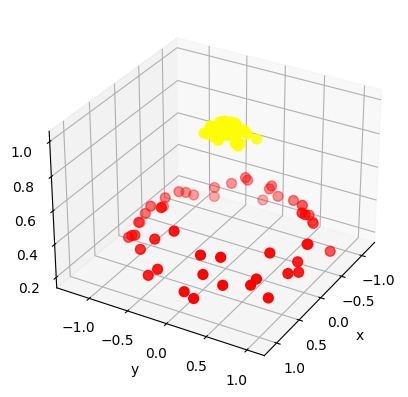

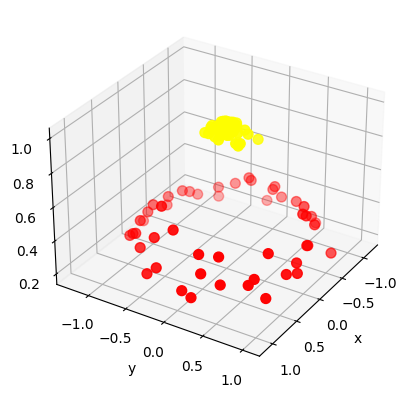

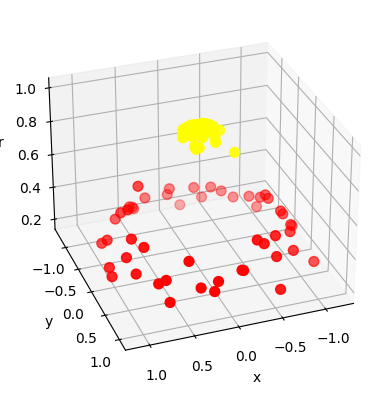

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))



* mplot3d: Modul dari matplotlib untuk membuat plot 3D.
* ipywidgets: Digunakan untuk membuat widget interaktif di Jupyter Notebook, seperti slider untuk mengubah parameter secara real-time.
* plot_3D: Fungsi yang membuat scatter plot 3D dan menerima parameter untuk mengatur sudut pandang.
* elev=30: Sudut elevasi default untuk pengaturan sudut pandang (kemiringan dari atas ke bawah).
* azim=30: Sudut azimut default untuk sudut horizontal (perputaran ke kiri/kanan).
* X=X, y=y: Data fitur X dan label y.
* ax = plt.subplot(projection='3d'): Membuat subplot 3D.
* x.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn'): Membuat scatter plot 3D.
* ax.view_init(elev=elev, azim=azim): Mengatur sudut pandang kamera
* ax.set_xlabel('x'), ax.set_ylabel('y'), dan ax.set_zlabel('r'): Menetapkan label untuk sumbu x, y, dan z.
* interact(plot_3D, ...): Membuat widget interaktif yang memungkinkan pengguna mengubah nilai elev dan azim untuk melihat plot dari sudut berbeda.
* elev=[-90, 45, 30, 20, 10]: Membuat slider untuk mengatur sudut elevasi dengan pilihan dari daftar yang diberikan.
* azip=(-180, 180): Membuat slider dengan kisaran -180 hingga 180 derajat untuk mengubah azimut (perputaran horizontal).
* X=fixed(X) dan y=fixed(y): Mengunci nilai X dan y sehingga mereka tetap konstan saat sudut pandang diubah.

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

* SVC: Merupakan Support Vector Classifier dari pustaka scikit-learn. Ini adalah salah satu jenis Support Vector Machine (SVM) yang digunakan untuk klasifikasi.
* kernel='rbf': Menunjukkan bahwa model menggunakan Radial Basis Function (RBF) sebagai kernel.
* C=1E6: Parameter regularisasi C adalah nilai yang mengontrol seberapa ketat model akan menyesuaikan data.
* clf.fit(X, y): Melatih model SVM menggunakan data fitur X dan label target y.



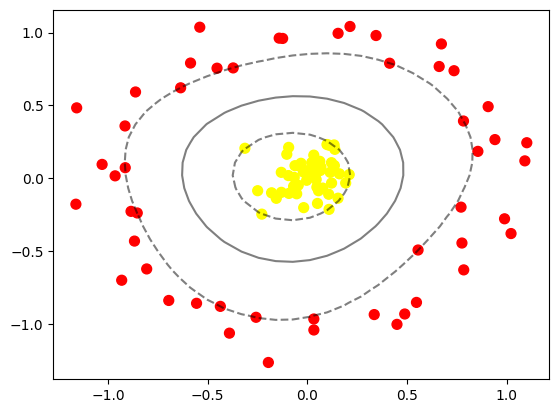

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

* plt.scatter: Membuat scatter plot dari data X dan y untuk memvisualisasikan data dalam ruang 2D.
* plot_svc_decision_function(clf): Fungsi ini memplot decision boundary (garis batas keputusan) yang dipelajari oleh model SVM (clf).
* clf.support_vectors_: Array yang menyimpan support vectors.
* plt.scatter: Membuat scatter plot dari support vectors.


Data Overlap

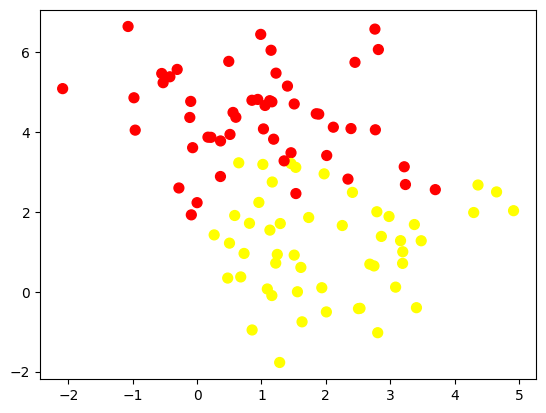

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

* make_blobs: Fungsi dari pustaka sklearn.datasets yang digunakan untuk menghasilkan dataset sintetis yang terdiri dari kelompok-kelompok data (blobs).
* plt.scatter: Fungsi dari matplotlib yang digunakan untuk membuat scatter plot untuk memvisualisasikan data.

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

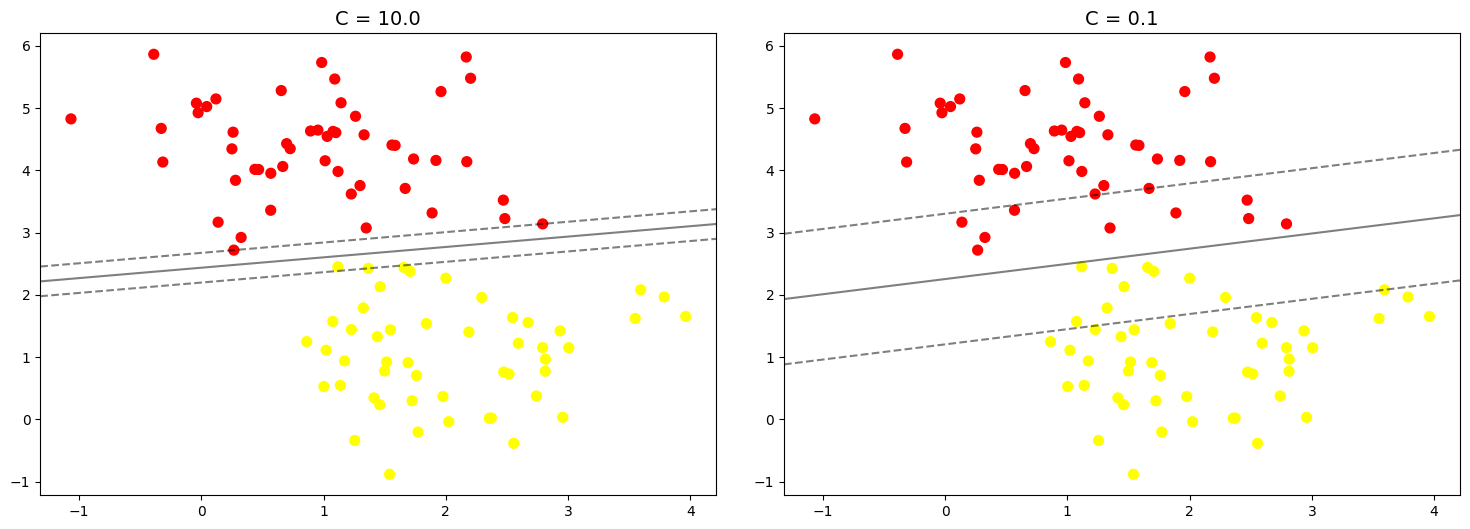

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

* make_blobs: Menghasilkan dataset sintetis dengan 100 titik data yang terbagi menjadi 2 kelompok (centers).
* plt.subplots(1, 2, figsize=(16, 6)): Membuat figure dengan 1 baris dan 2 kolom subplot. Ukuran figure ditetapkan 16x6 inci.
* fig.subplots_adjust(...): Menyesuaikan jarak antar subplot untuk memperbaiki tampilan.
* zip(ax, [10.0, 0.1]): Menggabungkan setiap subplot (ax) dengan dua nilai C (10.0 dan 0.1) untuk iterasi.
* SVC(kernel='linear', C=C).fit(X, y): Membuat model SVM dengan kernel linear untuk setiap nilai C dan melatihnya menggunakan dataset X dan y.
* axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') : Menampilkan titik data dalam subplot yang sesuai dengan warna berdasarkan kelas y.
* plot_svc_decision_function(model, axi) : Memanggil fungsi untuk menggambar decision boundary (garis batas keputusan) untuk model yang dilatih, serta margin di sekitarnya.
* axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
s=300, lw=1, facecolors='none')
: Menampilkan support vectors dengan ukuran yang lebih besar dan garis tepi yang terlihat, tanpa warna di dalamnya.
* axi.set_title('C = {0:.1f}'.format(C), size=14) : Memberi judul pada setiap subplot yang menunjukkan nilai C yang digunakan.

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

## Praktikum 2

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


* fetch_lfw_people: Fungsi ini digunakan untuk mengambil dataset Labeled Faces in the Wild (LFW), yang berisi gambar wajah orang-orang terkenal.
* min_faces_per_person=60: Parameter ini memastikan bahwa hanya orang-orang yang memiliki setidaknya 60 gambar wajah yang dimuat dalam dataset.
* faces: Variabel ini menyimpan objek yang berisi data wajah, termasuk gambar, label, dan informasi lainnya.
* faces.target_names: Menyediakan daftar nama orang yang ada dalam dataset.
* print(...): Menampilkan nama-nama orang yang terdapat dalam dataset di konsol.
* len(faces.target_names): Menghitung jumlah nama unik (kelas) dalam dataset, yaitu jumlah orang yang ada.
* faces.images: Menyimpan array yang berisi gambar-gambar wajah. Setiap gambar diwakili sebagai array 2D (grayscale).
* .shape: Memberikan dimensi dari array gambar, yang biasanya dalam format (n_samples, height, width), di mana n_samples adalah jumlah gambar, dan height serta width adalah dimensi setiap gambar.


In [ ]:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)

(1348, 62, 47)

* ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair'] : array yang berisi nama-nama orang terkenal yang terdapat dalam dataset.
 * Angka 8 menunjukkan bahwa ada total 8 orang unik dalam dataset, yang masing-masing memiliki setidaknya 60 gambar wajah.
 * (1348, 62, 47) : Ini adalah tuple yang menunjukkan dimensi dari array gambar dalam dataset.


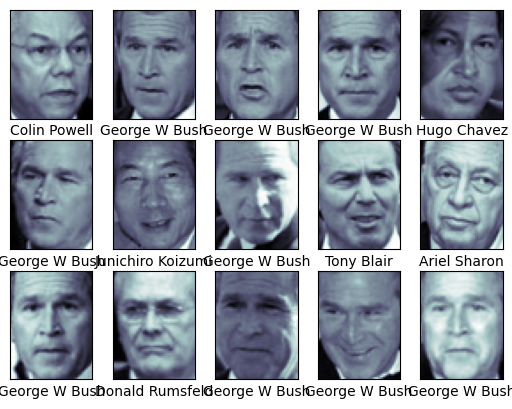

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

* plt.subplots(3, 5): Membuat figure dengan 3 baris dan 5 kolom subplot. Ini akan menampung total 15 gambar.
* fig: Merupakan objek figure utama.
* ax: Merupakan array dari subplot axes yang akan digunakan untuk menampilkan gambar.
* enumerate(ax.flat): Mengiterasi melalui setiap subplot (dalam bentuk array datar) sambil memberikan indeks i.
* axi.imshow(faces.images[i], cmap='bone'): Menampilkan gambar wajah di subplot saat ini (axi).
* xticks=[], yticks=[]: Menghilangkan tick marks pada sumbu x dan y untuk tampilan yang lebih bersih.
* xlabel=faces.target_names[faces.target[i]]: Menetapkan label untuk sumbu x, yang menunjukkan nama orang di gambar tersebut.


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

* from sklearn.svm import SVC: Mengimpor kelas Support Vector Classifier dari pustaka sklearn, yang digunakan untuk klasifikasi.
* from sklearn.decomposition import PCA as RandomizedPCA: Mengimpor PCA yang diterapkan dengan metode randomized dari sklearn.decomposition yang digunakan untuk mengurangi dimensi data sambil mempertahankan informasi yang penting.
* from sklearn.pipeline import make_pipeline: Mengimpor fungsi untuk membuat pipeline, yang memungkinkan penggabungan beberapa langkah (seperti preprocessing dan model) menjadi satu objek yang lebih mudah dikelola.
* RandomizedPCA(n_components=150, whiten=True, random_state=42): Membuat objek PCA dengan parameter tertentu.
* SVC(kernel='rbf', class_weight='balanced'): Membuat objek SVC dengan parameter tertentu.
* make_pipeline(pca, svc): Menggabungkan objek PCA dan SVC ke dalam satu pipeline.
* model: Menyimpan pipeline yang telah dibuat, yang sekarang dapat digunakan untuk melatih dan menguji model pada data.

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

* train_test_split: Fungsi ini diimpor dari modul sklearn.model_selection dan digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian
* train_test_split(...): Memanggil fungsi untuk membagi dataset.
* faces.data: Ini adalah array yang berisi data gambar wajah (fitur) dalam dataset.
* faces.target: Ini adalah array yang berisi label kelas (target) yang sesuai untuk setiap gambar.
* random_state=42: Menetapkan seed untuk pengacakan.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 44s, sys: 27 s, total: 2min 11s
Wall time: 1min 28s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


* GridSearchCV: Fungsi ini diimpor dari modul sklearn.model_selection dan digunakan untuk mencari kombinasi terbaik dari hyperparameter model dengan menggunakan validasi silang (cross-validation).
* param_grid: Sebuah dictionary yang mendefinisikan rentang nilai yang akan diuji untuk hyperparameter model.
* GridSearchCV(model, param_grid): Membuat objek Grid Search dengan model yang telah dibuat sebelumnya (pipeline yang berisi PCA dan SVC) dan parameter grid yang telah ditentukan.
* grid: Menyimpan objek Grid Search yang siap untuk digunakan dalam pencarian parameter.
* grid.fit(Xtrain, ytrain): Melatih model menggunakan data pelatihan Xtrain dan label ytrain dengan melakukan pencarian parameter terbaik berdasarkan kombinasi yang ditentukan dalam param_grid.
* %time: Ini adalah magic command di Jupyter Notebook yang digunakan untuk mengukur waktu eksekusi dari perintah yang diikuti.
* grid.best_params_: Mengembalikan kombinasi parameter terbaik yang ditemukan selama pencarian.
* grid.best_score_: Mengembalikan skor terbaik (biasanya akurasi) yang dicapai oleh model dengan parameter terbaik selama validasi silang.

Prediksi label untuk data testing

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

* grid.best_estimator_: Ini mengembalikan model terbaik yang ditemukan oleh objek GridSearchCV setelah melakukan pencarian parameter.
* model: Menyimpan model terbaik yang akan digunakan untuk prediksi.
* model.predict(Xtest): Menggunakan model terbaik untuk melakukan prediksi pada data pengujian Xtest.
* yfit: Menyimpan hasil prediksi, yaitu label kelas yang diprediksi untuk setiap gambar dalam Xtest.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

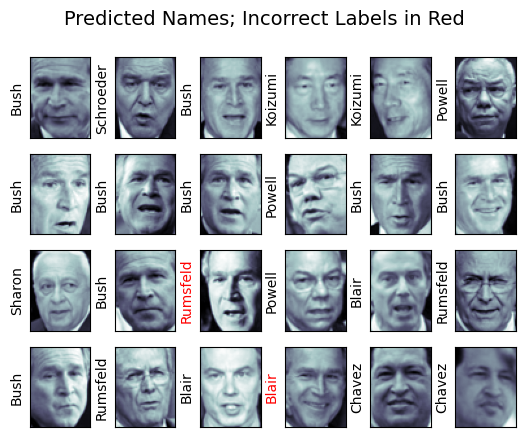

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

* plt.subplots(4, 6): Membuat figure dengan 4 baris dan 6 kolom subplot. Ini akan menampilkan total 24 gambar.
* enumerate(ax.flat): Mengiterasi melalui setiap subplot (dalam bentuk array datar) sambil memberikan indeks i.
* Xtest[i].reshape(62, 47): Mengubah array datar (1D) dari gambar ke dalam bentuk 2D (62x47 piksel) agar dapat ditampilkan.
* axi.imshow(..., cmap='bone'): Menampilkan gambar wajah di subplot saat ini (axi) menggunakan colormap 'bone' untuk efek grayscale.
* xticks=[], yticks=[]: Menghilangkan tick marks pada sumbu x dan y untuk tampilan yang lebih bersih.
* faces.target_names[yfit[i]]: Mengambil nama orang yang diprediksi berdasarkan label hasil prediksi yfit[i].
* .split()[-1]: Mengambil nama terakhir dari string (biasanya nama belakang).
* color='black' if yfit[i] == ytest[i] else 'red': Menetapkan warna label
* fig.suptitle(...): Menambahkan judul di atas seluruh figure, menjelaskan bahwa nama yang diprediksi ditampilkan dan bahwa label yang salah ditandai dengan warna merah.

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



* classification_report: Fungsi ini diimpor dari modul sklearn.metrics yang digunakan untuk menghasilkan laporan yang merangkum berbagai metrik kinerja klasifikasi, seperti presisi, recall, dan F1-score.
* classification_report(ytest, yfit, ...): Memanggil fungsi untuk menghitung laporan klasifikasi.

Text(113.92222222222219, 0.5, 'predicted label')

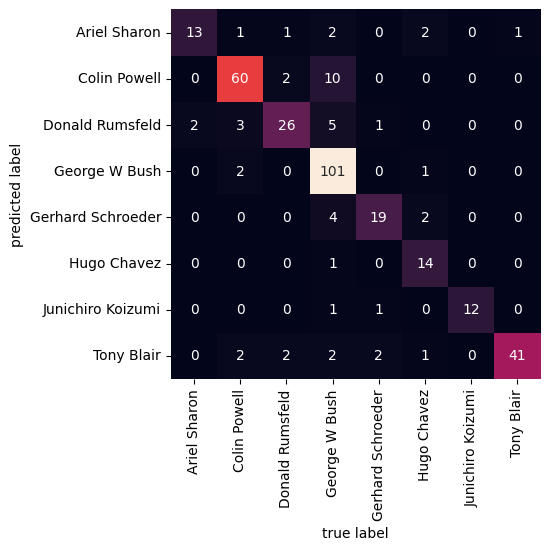

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

* confusion_matrix: Fungsi ini diimpor dari modul sklearn.metrics yang digunakan untuk menghitung matriks kebingungan, yang merupakan alat untuk mengevaluasi kinerja model klasifikasi.
* confusion_matrix(ytest, yfit): Memanggil fungsi untuk menghitung matriks kebingungan.
* sns.heatmap(...): Menggunakan Seaborn untuk membuat heatmap dari matriks kebingungan yang sudah dihitung.
* plt.xlabel(...): Menetapkan label untuk sumbu x sebagai "true label" (label sebenarnya).
* plt.ylabel(...): Menetapkan label untuk sumbu y sebagai "predicted label" (label yang diprediksi).
Kesimpulan

## Praktikum 3

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

Mendefiniskan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[118  98]
 [ 62 132]
 [ 40 229]
 [164  24]
 [128 142]
 [132  31]
 [ 88 118]
 [ 76  84]
 [ 92  24]
 [ 28  68]
 [ 59  96]
 [ 71 174]
 [ 34  39]
 [143 165]
 [120 115]
 [ 94 186]
 [259  52]
 [115 202]
 [ 82  96]
 [ 80  84]
 [ 52  91]
 [127   3]
 [ 25 155]
 [ 63   8]
 [ 25 104]
 [ 31 254]
 [134 156]
 [139 133]
 [147 233]
 [ 44  30]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


* import numpy as np
from sklearn.datasets import make_classification : mengimpor pustaka NumPy untuk manipulasi array dan make_classification dari scikit-learn untuk membuat dataset dummy untuk klasifikasi.
* Fungsi make_classification digunakan untuk menghasilkan dataset dummy.
* n_samples=30: Menghasilkan 30 sampel data.
n_features=2: Setiap sampel memiliki 2 fitur.
n_classes=2: Ada 2 kelas (label) yang berbeda.
n_informative=2: Kedua fitur yang dihasilkan adalah informatif untuk klasifikasi.
n_redundant=0: Tidak ada fitur yang redundan.
n_repeated=0: Tidak ada fitur yang diulang.
shuffle=False: Data tidak diacak.
* Menggunakan np.absolute untuk memastikan semua nilai dalam array X adalah positif yang berguna jika Anda ingin menghindari nilai negatif dalam dataset.
* X = np.round(X, 2) * 100 : np.round(X, 2): Membulatkan setiap nilai dalam X hingga 2 angka di belakang koma. * 100 : Mengalikan setiap nilai dengan 100 untuk mengubah skala nilai menjadi integer yang lebih besar dan menghilangkan desimal.

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,118,98,0
1,62,132,0
2,40,229,0
3,164,24,0
4,128,142,0


* import pandas as pd: Mengimpor library pandas, yang digunakan untuk manipulasi data dalam bentuk DataFrame.
* .reshape(len(y), 1) mengubah array 1D menjadi 2D (misalnya, dari bentuk (100,) menjadi (100, 1)), sehingga bisa digabungkan secara horizontal dengan array fitur X
* np.concatenate() digunakan untuk menggabungkan dua array, dalam hal ini array X (fitur) dan y_new (label).
* nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']:
Mendefinisikan nama kolom untuk DataFrame.
* df = pd.DataFrame(data, columns=nama_kolom):
Membuat DataFrame menggunakan array data yang sudah digabungkan (fitur X dan label y_new).
* df.head():
Menampilkan 5 baris pertama dari DataFrame df untuk mengecek apakah DataFrame telah dibuat dengan benar dan meninjau isinya.


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,118,98,Kelas B
1,62,132,Kelas B
2,40,229,Kelas B
3,164,24,Kelas B
4,128,142,Kelas B


* Mendefinisikan dictionary labels:
Key adalah nilai numerik (1 dan 0) dari label asli yang mungkin dihasilkan oleh model klasifikasi.
Value adalah label yang lebih mudah dibaca oleh manusia: 'Kelas A' untuk 1 dan 'Kelas B' untuk 0. Ini dilakukan untuk mengganti label numerik dengan label deskriptif.
* Membuat salinan DataFrame df menjadi df_label:
df.copy() membuat duplikat DataFrame df sehingga df_label menjadi DataFrame baru yang terpisah.
Ini berguna untuk menghindari modifikasi langsung pada df as
* Mengubah nilai pada kolom 'Label' di df_label menggunakan fungsi map() dari Pandas:
df_label['Label'] mengacu pada kolom 'Label' di DataFrame df_label.
.map(labels) akan mengganti nilai-nilai pada kolom 'Label' sesuai dengan dictionary labels
* f_label.head():
Menampilkan 5 baris pertama dari DataFrame df_label.

## (Opsional) Visualisasi Data

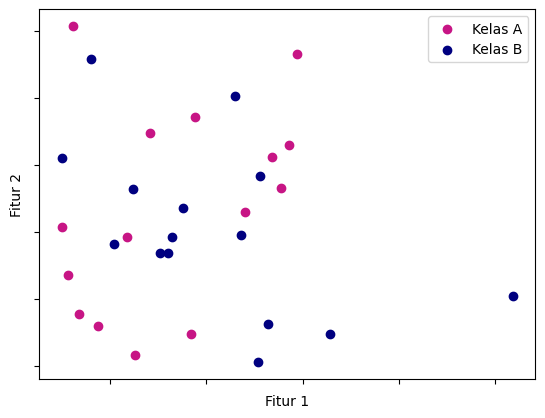

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.47619047619047616
Hasil akurasi data test: 0.7777777777777778


## Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.3333333333333333


## Praktikum 4 Opsional

Load Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Pra Pengolahan Data


Drop Kolom

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama Kolom V1 dan V2

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Inspeksi Data

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Encode Label

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Mamisahkan Fitur dengan Label

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

Ekstraksi Fitur

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


Training dan Evaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


## Praktikum 5

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

* from pathlib import Path:
Mengimpor Path dari library pathlib. Library ini digunakan untuk bekerja dengan sistem file dan jalur direktori dalam cara yang lebih modern dan platform-independen dibandingkan dengan metode lama seperti os.path.
* import matplotlib.image as mpimg:
Mengimpor modul image dari matplotlib dan menyingkatnya sebagai mpimg.
* import matplotlib.pyplot as plt:
Mengimpor pyplot dari matplotlib dengan alias plt.
* import cv2:
Mengimpor OpenCV, yang merupakan library terkenal untuk pemrosesan gambar dan penglihatan komputer (computer vision).
* import random:
Mengimpor modul random dari Python, yang digunakan untuk menghasilkan bilangan acak atau memilih elemen secara acak dari daftar.

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Mesin Learning/images/images/training/"
test_dir = "/content/drive/MyDrive/Mesin Learning/images/images/test"

* train_dir: Variabel ini menyimpan jalur ke direktori di mana gambar-gambar yang akan digunakan untuk melatih model disimpan.
* test_dir: Variabel ini menyimpan jalur ke direktori di mana gambar-gambar yang akan digunakan untuk menguji model disimpan.

Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

* def load_dataset(img_dir): Mendefinisikan fungsi load_dataset yang menerima satu parameter, img_dir, yaitu jalur direktori tempat gambar disimpan.
*  p = Path(img_dir) : Menggunakan modul Path dari pathlib untuk membuat objek Path berdasarkan jalur direktori yang diberikan (img_dir).
* dirs = p.glob('*') : Menggunakan metode glob('*') untuk mengambil semua subdirektori di dalam direktori yang ditunjuk oleh p. Ini menghasilkan iterator dari semua direktori di dalam img_dir.
*     img_list = [] : Membuat list kosong img_list yang akan menyimpan pasangan gambar dan labelnya.
*     for dir in dirs: Memulai loop untuk iterasi setiap subdirektori (dir) yang ditemukan di dirs.
*         label = str(dir).split('/')[-1] : Mengambil nama subdirektori (label) dengan mengubah objek Path menjadi string, membaginya berdasarkan karakter /, dan mengambil elemen terakhir (nama subdirektori).
*         for file in dir.glob('*.jpg'):Memulai loop untuk iterasi setiap file gambar berformat .jpg di dalam subdirektori saat ini (dir).
*             img = mpimg.imread(file) : Membaca gambar menggunakan mpimg.imread dari matplotlib.image dan menyimpan hasilnya dalam variabel img.
*             if not img is None:Memeriksa apakah gambar yang dibaca tidak kosong (tidak None).
*                 img_list.append((img, label)): Jika gambar valid, menambahkan tuple (img, label) ke dalam img_list, di mana img adalah gambar dan label adalah nama subdirektori yang mewakili kategori gambar tersebut.
*     return img_list : Mengembalikan img_list yang berisi semua gambar dan label yang telah dimuat dari direktori.

Load gambar training

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

berfungsi untuk memanggil fungsi load_dataset yang telah didefinisikan sebelumnya dengan parameter train_dir.

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [206, 208, 221],
         [213, 215, 228],
         [222, 224, 237]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [179, 181, 194],
         [200, 199, 213],
         [221, 223, 236]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [202, 201, 215],
         [206, 204, 218],
         [207, 206, 220]],
 
        ...,
 
        [[ 60,  70,  80],
         [ 60,  70,  80],
         [ 60,  70,  80],
         ...,
         [109,  93,  78],
         [110,  92,  78],
         [110,  94,  79]],
 
        [[ 60,  70,  80],
         [ 60,  70,  80],
         [ 60,  70,  80],
         ...,
         [107,  93,  80],
         [109,  93,  78],
         [108,  95,  79]],
 
        [[ 59,  69,  79],
         [ 59,  69,  79],
         [ 59,  69,  79],
         ...,
         [107,  93,  80],
  

digunakan untuk mengakses elemen pertama dari list train_img.

Cek ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 225
(555, 800, 3)


* np.random.randint(0, len(train_img)): Menggunakan fungsi randint dari NumPy untuk menghasilkan bilangan bulat acak.
* pick_random: Variabel ini menyimpan indeks acak yang dihasilkan, yang akan digunakan untuk memilih gambar secara acak dari train_img.
* print(....) : digunakan untuk mencetak pesan
* train_img[pick_random][0]: Mengakses gambar yang berada pada indeks acak yang disimpan dalam pick_random.
* .shape: Mengambil atribut shape dari array gambar, yang memberikan dimensi gambar tersebut (misalnya, tinggi, lebar, dan jumlah saluran warna).

Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

* def random_img_viz(img_list): Mendefinisikan fungsi random_img_viz yang menerima satu parameter, img_list, yaitu daftar pasangan gambar dan label yang ingin divisualisasikan.
*     rand_num = np.random.randint(0, len(img_list)) : Menggunakan fungsi randint dari NumPy untuk menghasilkan bilangan bulat acak (rand_num) dalam rentang dari 0 hingga panjang img_list.
*     img = img_list[rand_num][0] : Mengakses gambar yang berada pada indeks acak yang disimpan dalam rand_num. Ini mengambil elemen pertama dari tuple yang terdapat dalam img_list (gambarnya).
*     label = img_list[rand_num][1] : Mengakses label yang sesuai dengan gambar yang dipilih. Ini mengambil elemen kedua dari tuple dalam img_list (labelnya).
*     label_str = 'day' if label == 1 else 'night' : Menggunakan operator kondisional (ternary) untuk menetapkan string label_str. Jika label bernilai 1, maka label_str akan di-set ke 'day', jika tidak, akan di-set ke 'night'. Ini mungkin mencerminkan kategori yang lebih deskriptif berdasarkan nilai label.
*     plt.imshow(img) : Menggunakan plt.imshow dari Matplotlib untuk menampilkan gambar yang telah dipilih secara acak. Ini akan menampilkan gambar di jendela plot.
*     print(f'Shape\t: {img.shape}') : Mencetak bentuk (dimensi) gambar yang ditampilkan, memberikan informasi tentang ukuran gambar dalam format tinggi x lebar x jumlah saluran warna
*     print(f'Label\t: {label}') : Mencetak label asli dari gambar yang ditampilkan, memberi tahu pengguna kategori gambar tersebut.

Lakukan visualisasi gambar secara acak

Shape	: (469, 640, 3)
Label	: day


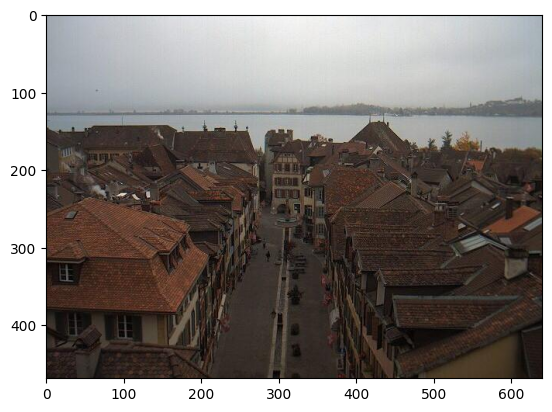

In [ ]:
random_img_viz(train_img)

* random_img_viz: Ini adalah nama fungsi yang telah didefinisikan sebelumnya untuk memvisualisasikan gambar secara acak dari daftar yang diberikan.
* train_img: Merupakan argumen yang diberikan ke fungsi. train_img adalah list yang berisi pasangan gambar dan label yang telah dimuat dari direktori pelatihan menggunakan fungsi load_dataset.

Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

* def standarized_input(image):Mendefinisikan fungsi standarized_input yang menerima satu parameter, image, yaitu gambar yang ingin diubah ukurannya.
* resize to w: 1100, h:600 : Ini adalah komentar yang menjelaskan tujuan dari fungsi, yaitu mengubah ukuran gambar menjadi lebar 1100 piksel dan tinggi 600 piksel.
*     std_img = cv2.resize(image, (1100, 600)) : Menggunakan fungsi resize dari OpenCV (cv2) untuk mengubah ukuran gambar (image) ke dimensi yang ditentukan (1100 piksel lebar dan 600 piksel tinggi).
*     return std_img : Mengembalikan gambar yang telah diubah ukurannya (std_img) sebagai output dari fungsi.

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

* def label_encoder(label):Mendefinisikan fungsi label_encoder yang menerima satu parameter, label, yaitu label yang ingin dienkode (dalam hal ini, bisa berupa string seperti 'day' atau 'night').
*     num_val = 0 : Menginisialisasi variabel num_val dengan nilai 0. Ini akan digunakan untuk menyimpan nilai numerik hasil enkoding.
*     if(label == 'day'):
        num_val = 1 : Memeriksa apakah label sama dengan 'day'. Jika benar, maka num_val diubah menjadi 1. Ini mengenkode label 'day' sebagai 1.
*     return num_val : Mengembalikan nilai num_val sebagai output dari fungsi. Jika label adalah 'day', maka fungsi akan mengembalikan 1; jika tidak, fungsi akan mengembalikan 0 (nilai awal).

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

* def preprocess(img_list): Mendefinisikan fungsi preprocess yang menerima satu parameter, img_list, yaitu daftar pasangan gambar dan label yang akan diproses.
*     std_img_list = [] : Membuat list kosong std_img_list yang akan digunakan untuk menyimpan gambar yang telah distandarisasi dan label yang telah dienkode.
*     for item in img_list: Memulai loop untuk iterasi setiap pasangan gambar dan label (item) dalam img_list.
*         image = item[0]
        label = item[1] : Mengambil gambar dan label dari item. image adalah gambar, dan label adalah label yang sesuai.
* std_img = standarized_input(image) : Memanggil fungsi standarized_input untuk mengubah ukuran gambar (image) ke dimensi yang telah ditentukan (misalnya, 1100x600 piksel) dan menyimpan hasilnya dalam std_img.
*  img_label = label_encoder(label) : Memanggil fungsi label_encoder untuk mengenkode label (label) ke dalam bentuk numerik (0 atau 1) dan menyimpan hasilnya dalam img_label.
*         std_img_list.append((std_img, img_label)) : Menambahkan tuple (std_img, img_label) ke dalam std_img_list. Ini berarti gambar yang telah distandarisasi dan label yang telah dienkode disimpan bersama.
*     return std_img_list : Mengembalikan std_img_list sebagai output dari fungsi. List ini berisi semua gambar yang telah distandarisasi dan label yang telah dienkode.


Lakukan pra pengolahan data pada data training.

In [ ]:
train_std_img_list = preprocess(train_img)

berfungsi untuk memanggil fungsi preprocess dengan parameter train_img.

Lakukan pengecekan ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 90
(600, 1100, 3)


* np.random.randint(0, len(train_std_img_list)): Menggunakan fungsi randint dari NumPy untuk menghasilkan bilangan bulat acak (pick_random) dalam rentang dari 0 hingga panjang train_std_img_list (tidak termasuk).
* print(f'Image {pick_random}') : Mencetak pesan yang menunjukkan indeks gambar yang dipilih secara acak. Menggunakan f-string untuk menyisipkan nilai dari pick_random ke dalam string.
* train_std_img_list[pick_random][0]: Mengakses gambar yang berada pada indeks acak yang disimpan dalam pick_random.

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 0


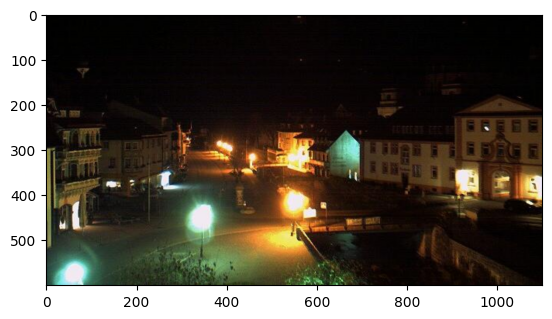

In [ ]:
random_img_viz(train_std_img_list)

berfungsi untuk memanggil fungsi random_img_viz dengan parameter train_std_img_list.

Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

* def avg_brightness(image): Mendefinisikan fungsi avg_brightness yang menerima satu parameter, image, yaitu gambar yang ingin dianalisis untuk mendapatkan rata-rata kecerahannya.
*     img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) : Menggunakan fungsi cvtColor dari OpenCV (cv2) untuk mengonversi gambar (image) ke ruang warna HSV (Hue, Saturation, Value). Hasilnya disimpan dalam variabel img_hsv.
*     sum_brightness = np.sum(img_hsv[:,:,2]) : Menghitung total kecerahan dengan menjumlahkan semua nilai di saluran ke-3 (V channel) dari gambar HSV.
*     area = image.shape[0] * image.shape[1] : Menghitung luas gambar dengan mengalikan tinggi (image.shape[0]) dan lebar (image.shape[1]) gambar. Hasilnya disimpan dalam variabel area.
*     avg = sum_brightness / area : Menghitung rata-rata kecerahan dengan membagi total kecerahan (sum_brightness) dengan luas gambar (area). Rata-rata kecerahan disimpan dalam variabel avg.
*     return avg : Mengembalikan nilai rata-rata kecerahan (avg) sebagai output dari fungsi.

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 22
Avg Brighness: 196.8264


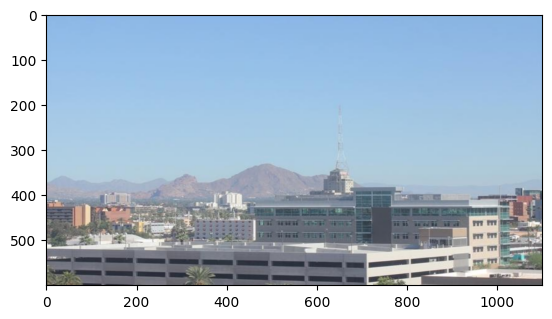

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

* rand_img = np.random.randint(0, len(train_std_img_list)) : Menggunakan fungsi randint dari NumPy untuk menghasilkan bilangan bulat acak (rand_img) dalam rentang dari 0 hingga panjang train_std_img_list (tidak termasuk).
* feature_img = train_std_img_list[rand_img][0] : Mengakses gambar yang berada pada indeks acak yang disimpan dalam rand_img. Ini mengambil elemen pertama dari tuple (gambarnya) dalam train_std_img_list dan menyimpannya dalam variabel feature_img.
* avg_img = avg_brightness(feature_img) : Memanggil fungsi avg_brightness untuk menghitung rata-rata kecerahan gambar yang disimpan dalam feature_img. Hasil rata-rata kecerahan disimpan dalam variabel avg_img.
* print(f'Image {rand_img}') : Mencetak pesan yang menunjukkan indeks gambar yang dipilih secara acak, menggunakan f-string untuk menyisipkan nilai dari rand_img.
* print(f'Avg Brighness: {avg_img:.4f}') : Mencetak rata-rata kecerahan gambar yang telah dihitung, dengan format 4 desimal. Ini memberikan informasi tentang seberapa terang gambar tersebut.
* plt.imshow(feature_img) : Menggunakan plt.imshow dari Matplotlib untuk menampilkan gambar yang telah dipilih secara acak (feature_img). Ini akan menampilkan gambar di jendela plot.

Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

penjelasan : secara keseluruhan, kode fungsi predict_label digunakan untuk memprediksi label (kategori) sebuah gambar berdasarkan kecerahan rata-ratanya dan ambang batas (threshold) yang ditentukan oleh pengguna.

Lakukan pengecekan prediksi secara acak pada data training

Image 75
Actual label: 1
Predicted label: 0


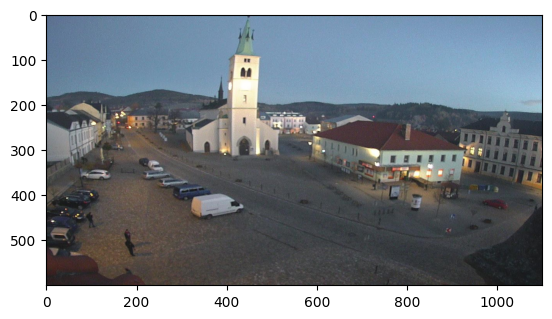

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

penjelasan : Secara keseluruhan, kode yang diberikan digunakan untuk menguji fungsi klasifikasi (predict_label) pada gambar acak dari dataset yang telah distandarisasi, serta membandingkan label yang diprediksi dengan label yang sebenarnya.

Langkah 6 - Evaluasi (Manual)

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

penjelasan : Secara keseluruhan, kode fungsi evaluate digunakan untuk mengevaluasi kinerja model klasifikasi berdasarkan gambar dalam daftar (img_list) dan ambang batas (threshold) yang ditentukan.

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM
Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

Langkah 4 alternatif - Membuat Feature Vectors

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

penjelasan : Secara keseluruhan, kode fungsi extract_avg_bright_feature digunakan untuk mengekstrak fitur rata-rata kecerahan dari setiap gambar dalam daftar (img_list) dan menyimpannya dalam format tabular menggunakan Pandas DataFrame.


Cek hasilnya pada data training,

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,125.832135,1.0
1,103.307636,1.0
2,157.366744,1.0
3,129.001000,1.0
4,137.345858,1.0


penjelasan : Secara keseluruhan, kode yang diberikan digunakan untuk mengekstrak fitur rata-rata kecerahan dari gambar dalam dataset pelatihan (train_std_img_list) dan menyimpan hasilnya dalam sebuah DataFrame Pandas.

Lakukan langkah yang serupa pada data testing

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,133.870114,1.0
1,153.538970,1.0
2,141.639714,1.0
3,109.134433,1.0
4,194.228062,1.0


penjelasan : Secara keseluruhan, kode yang diberikan digunakan untuk mengekstrak fitur rata-rata kecerahan dari gambar dalam dataset pengujian (test_std_img_list) dan menyimpan hasilnya dalam sebuah DataFrame Pandas.

Langkah 5 alternatif

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

penjelasaan : Secara keseluruhan, kode yang diberikan digunakan untuk membangun dan melatih model Support Vector Machine (SVM) menggunakan data rata-rata kecerahan dari gambar dalam dataset pelatihan

Langkah 6 alternatif

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Secara keseluruhan, kode yang diberikan digunakan untuk mengevaluasi kinerja model SVM yang telah dilatih dengan menghitung akurasi pada data pelatihan dan data pengujian.
* from sklearn.metrics import accuracy_score
: Mengimpor fungsi accuracy_score dari pustaka sklearn.metrics, yang digunakan untuk menghitung akurasi model.
* y_train_pred = model.predict(X_train) : Menggunakan model yang telah dilatih untuk memprediksi label pada data pelatihan (X_train). Hasil prediksi disimpan dalam variabel y_train_pred.
* acc_train = accuracy_score(y_train, y_train_pred) : Menghitung akurasi dengan membandingkan label sebenarnya (y_train) dengan label yang diprediksi (y_train_pred). Hasil akurasi disimpan dalam variabel acc_train.
* y_test_pred = model.predict(X_test) : Menggunakan model yang sama untuk memprediksi label pada data pengujian (X_test). Hasil prediksi disimpan dalam variabel y_test_pred.
* acc_test = accuracy_score(y_test, y_test_pred) : Menghitung akurasi untuk data pengujian dengan membandingkan label sebenarnya (y_test) dengan label yang diprediksi (y_test_pred). Hasil akurasi disimpan dalam variabel acc_test.
* print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}') : Mencetak hasil akurasi untuk kedua dataset (data pelatihan dan data pengujian). Ini memberikan informasi tentang seberapa baik model SVM bekerja pada data yang telah dilatih serta kemampuannya untuk generalisasi pada data baru.

## Tugas 1

In [15]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [ ]:
# Membaca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Mesin Learning/voice.csv')

# Memisahkan fitur dan label
X = data.drop('label', axis=1)
y = data['label']

# Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model SVM
model = SVC(kernel='rbf', C=50)
model.fit(X_train, y_train)

# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model SVM: {accuracy}')


Akurasi model SVM: 0.973186119873817


2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan


1. Menggunakan data spam.csv
2. Fitur CountVectorizer dengan mengaktifkan stop_words
3. Evaluasi hasilnya

In [17]:
# Baca data
df = pd.read_csv('/content/drive/MyDrive/Mesin Learning/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

# Menampilkan 5 data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
# Drop kolom
df = df.drop(df.columns[2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Ubah nama kolom v1 dan v2
df.rename(columns={'v1': 'Labels', 'v2': 'SMS'}, inplace=True)

# Cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Mengambil kolom 'SMS' sebagai fitur (X) dan kolom 'Labels' sebagai label (y)
X = df['SMS'].values  # 'SMS' berisi teks pesan yang akan digunakan sebagai fitur
y = df['Labels'].values  # 'Labels' berisi label (misalnya 'spam' atau 'ham')

# Membagi data menjadi data training dan data testing dengan rasio 80:20
# test_size=0.2 berarti 20% dari data digunakan untuk testing, sedangkan 80% untuk training
# random_state=50 digunakan agar hasil pembagian data selalu konsisten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [21]:
# Menginisialisasi objek CountVectorizer untuk mengubah teks menjadi representasi vektor (bag of words)
# stop_words='english' akan menghapus kata-kata umum bahasa Inggris seperti "the", "is", "in", dsb.,
# karena kata-kata tersebut biasanya tidak memberikan informasi penting untuk klasifikasi.
cv = CountVectorizer(stop_words='english')

# Melakukan fit (belajar dari data training) dan transformasi data training ke representasi vektor
# Setiap pesan di X_train diubah menjadi representasi berbasis kata (frekuensi kemunculan kata)
X_train = cv.fit_transform(X_train)

# Transformasi data testing menggunakan informasi dari data training (fit tidak dilakukan lagi, hanya transformasi)
# Ini memastikan bahwa vektor dari data testing memiliki representasi yang sama dengan data training
X_test = cv.transform(X_test)

# Menampilkan jumlah fitur (kata unik) yang ada setelah proses vectorization
print(len(cv.get_feature_names_out()))  # get_feature_names_out() mengembalikan daftar fitur/kolom yang digunakan.

# Menampilkan dimensi (shape) dari data training setelah transformasi
# Shape menunjukkan jumlah data (baris) dan jumlah fitur (kolom) setelah proses vektorisasi
print(f'Data: {X_train.shape}')


7466
Data: (4457, 7466)


In [22]:
# Menggunakan model multinomial
model_mn = MultinomialNB()
model_mn.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model_mn.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data testing
y_pred_test = model_mn.predict(X_test)

# Evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Data train: {acc_train}')
print(f'Data test: {acc_test}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred_test))

Data train: 0.9946152120260264
Data test: 0.9829596412556054
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       954
        spam       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,


1. Menggunakan data spam.csv

2. Fitur TF-IDF dengan mengaktifkan stop_words

3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [23]:
# Baca data
df = pd.read_csv('/content/drive/MyDrive/Mesin Learning/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

# Menampilka 5 data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
# Drop kolom
df = df.drop(df.columns[2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# Ubah nama kolom v1 dan v2
df.rename(columns={'v1': 'Labels', 'v2': 'SMS'}, inplace=True)

# Cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# Encode label 'spam' menjadi 1 dan 'ham' menjadi 0
df['Labels'] = df['Labels'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# Pisahkan fitur dengan label
X = df['SMS'].values
y = df['Labels'].values

# Buat model TF-IDF tanpa mengimport TfidfVectorizer lagi
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(len(tfidf.get_feature_names_out()))
print(f'Data: {X_train_tfidf.shape}')

8404
Data: (4457, 8404)


In [28]:
# Buat model klasifikasi Multinomial Naive Bayes dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train_tfidf, X_test_tfidf, y_train_spam, y_test_spam = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train_tfidf, y_train_spam)
nb_tfidf_predictions = nb_tfidf_model.predict(X_test_tfidf)

# Evaluasi model Multinomial Naive Bayes dengan TF-IDF
from sklearn.metrics import classification_report, accuracy_score

print("\nEvaluasi Model Multinomial Naive Bayes dengan TF-IDF:")
print(classification_report(y_test_spam, nb_tfidf_predictions))
print("Akurasi Multinomial Naive Bayes dengan TF-IDF:", accuracy_score(y_test_spam, nb_tfidf_predictions))

# Buat model klasifikasi Multinomial Naive Bayes dengan CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train_count, X_test_count, y_train_spam, y_test_spam = train_test_split(X_count, y, test_size=0.2, random_state=42)

nb_count_model = MultinomialNB()
nb_count_model.fit(X_train_count, y_train_spam)
nb_count_predictions = nb_count_model.predict(X_test_count)

# Evaluasi model Multinomial Naive Bayes dengan CountVectorizer
print("\nEvaluasi Model Multinomial Naive Bayes dengan CountVectorizer:")
print(classification_report(y_test_spam, nb_count_predictions))
print("Akurasi Multinomial Naive Bayes dengan CountVectorizer:", accuracy_score(y_test_spam, nb_count_predictions))


Evaluasi Model Multinomial Naive Bayes dengan TF-IDF:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Akurasi Multinomial Naive Bayes dengan TF-IDF: 0.968609865470852

Evaluasi Model Multinomial Naive Bayes dengan CountVectorizer:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Akurasi Multinomial Naive Bayes dengan CountVectorizer: 0.9802690582959641


Kesimpulan : Pada kasus spam.csv, model dengan fitur TF-IDF menunjukkan kinerja lebih baik dibandingkan CountVectorizer, dilihat dari metrik akurasi, presisi, recall, dan skor F1 yang lebih tinggi. Kesimpulannya, TF-IDF lebih efektif dalam mengklasifikasikan data spam dan non-spam karena mampu menangkap informasi teks yang lebih relevan.

## Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.



Menggunakan beberapa library seperti OpenCV untuk memproses gambar dan Scikit-learn untuk membangun model SVM.

In [1]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

Histogram akan digunakan sebagai fitur untuk klasifikasi. Kemudian menghitung histogram dari gambar dalam ruang warna HSV.

In [9]:
def extract_histogram(image, bins=(8, 8, 8)):
    # Konversi gambar ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Hitung histogram dalam 3 channel (H, S, V)
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Normalisasi histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

 Membaca gambar dari direktori training dan testing, kemudian mengekstrak histogram dari setiap gambar.

In [10]:
def load_dataset(directory):
    data = []
    labels = []

    # Loop setiap folder (kelas) di direktori
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = cv2.imread(image_path)

                if image is not None:
                    # Ekstrak fitur histogram dari gambar
                    hist = extract_histogram(image)
                    data.append(hist)
                    labels.append(class_label)

    return np.array(data), np.array(labels)


Muatan data dari direktori train dan test, serta ekstraksi fitur histogram dilakukan di sini.

In [11]:
train_dir = "/content/drive/MyDrive/Mesin Learning/images/images/training/"
test_dir = "/content/drive/MyDrive/Mesin Learning/images/images/test/"

# Load data
X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)


Sebelum melatih model, terlebih dahulu melakukan normalisasi fitur menggunakan StandardScaler.

In [12]:
scaler = StandardScaler()

# Fit dan transform data training
X_train = scaler.fit_transform(X_train)

# Transform data testing
X_test = scaler.transform(X_test)


Membuat model SVM dan melatihnya dengan data training.

In [13]:
# Inisialisasi model SVM dengan kernel linear
model = SVC(kernel='linear')

# Latih model dengan data training
model.fit(X_train, y_train)


SVC(kernel='linear')

Mengevaluasi performanya menggunakan data testing.

In [14]:
# Prediksi data testing
y_pred = model.predict(X_test)

# Tampilkan akurasi dan laporan klasifikasi
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Akurasi: 0.9625
              precision    recall  f1-score   support

         day       0.96      0.96      0.96        80
       night       0.96      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

